In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../input/stockpriceeda-timeseriesanalysis/'
company_list = ['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMGN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+file)
    all_data = pd.concat([all_data,current_df])

In [3]:
all_data.shape

(4752, 7)

In [4]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Analysing closing price of all the stocks.

In [5]:
tech_list = all_data['Name'].unique()

In [6]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [7]:
all_data['date']=pd.to_datetime(all_data['date'])

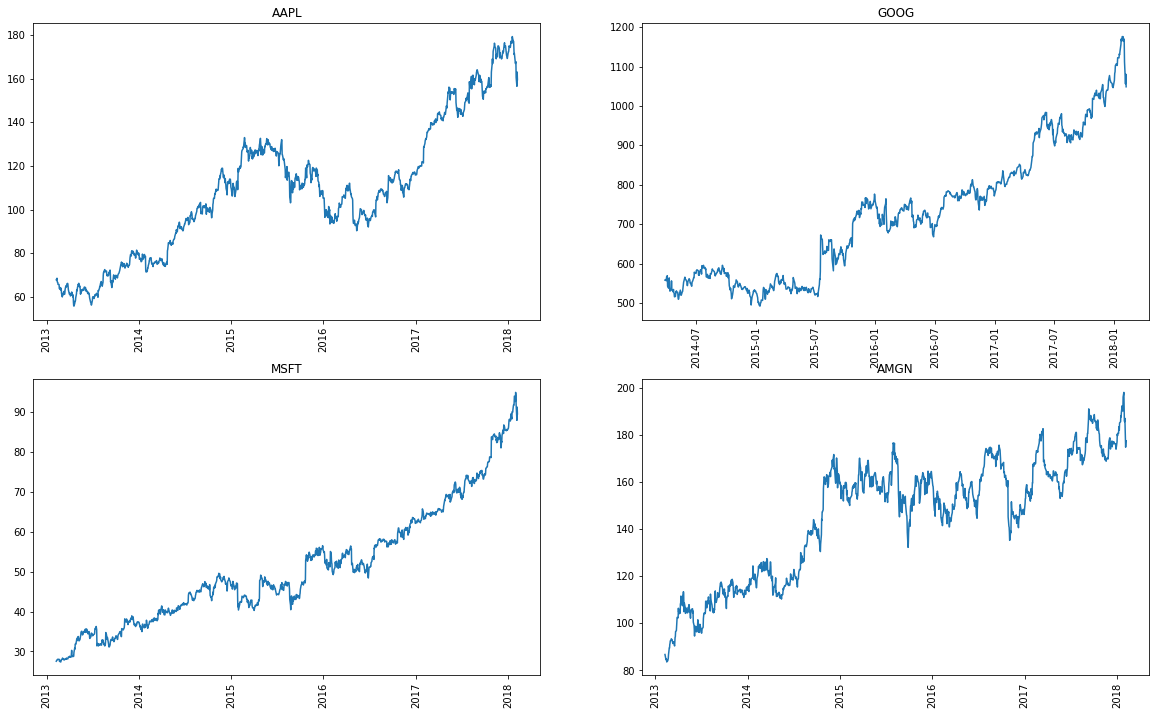

In [8]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)

# Analysing the total volume of stock being traded each day

In [9]:
import plotly.express as px

In [10]:
for comapany in tech_list:
    df = all_data[all_data['Name']==company]
    fig = px.line(df,x='date',y='volume',title=company)
    fig.show()

# Analysing Daily Price change in stock

In [11]:
df = pd.read_csv('../input/stockpriceeda-timeseriesanalysis/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [12]:
df['Daily_Price_change']=df['close']-df['open']

In [13]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [14]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100

In [15]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [16]:
df['date']=pd.to_datetime(df['date'])

In [17]:
fig = px.line(df,x='date',y='1day % return',title=company)
fig.show()

# Analysing monthly mean of close feature

In [18]:
df2 = df.copy()

In [19]:
df2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily_Price_change           float64
1day % return                float64
dtype: object

In [20]:
df2.set_index('date',inplace=True)

In [21]:
df2.head()

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [22]:
df2['2013-02-11':'2013-02-14']

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [23]:
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

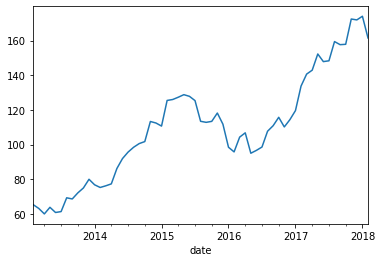

In [24]:
df2['close'].resample('M').mean().plot()

In [25]:
df2['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

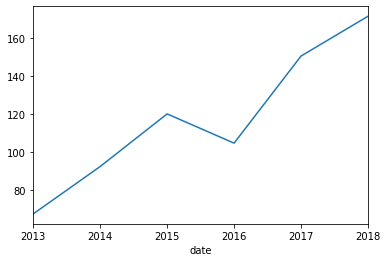

In [26]:
df2['close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='date'>

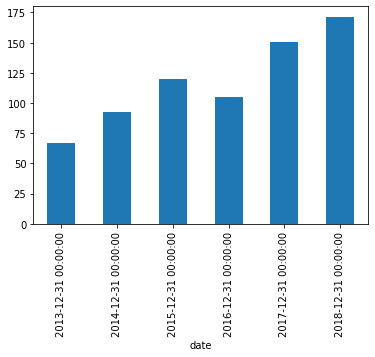

In [27]:
df2['close'].resample('Y').mean().plot(kind='bar')

# Analysing whether stock prices of the tech copanies correlated or not!!!

In [28]:
appl = pd.read_csv('../input/stockpriceeda-timeseriesanalysis/AAPL_data.csv')
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [29]:
amzn = pd.read_csv('../input/stockpriceeda-timeseriesanalysis/AMGN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,85.61,87.165,85.390,86.77,7888920,AMGN
1,2013-02-11,85.48,85.980,84.590,84.92,7538344,AMGN
2,2013-02-12,85.00,85.230,84.280,84.54,4655977,AMGN
3,2013-02-13,84.96,85.130,84.450,84.94,7943132,AMGN
4,2013-02-14,86.00,86.398,84.609,84.72,6189005,AMGN


In [30]:
msft = pd.read_csv('../input/stockpriceeda-timeseriesanalysis/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [31]:
goog = pd.read_csv('../input/stockpriceeda-timeseriesanalysis/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [32]:
close = pd.DataFrame()

In [33]:
close['aapl']=appl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [34]:
close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,86.77,27.55
1,68.5614,559.99,84.92,27.86
2,66.8428,556.97,84.54,27.88
3,66.7156,567.16,84.94,28.03
4,66.6556,567.00,84.72,28.04


In [35]:
import seaborn as sns

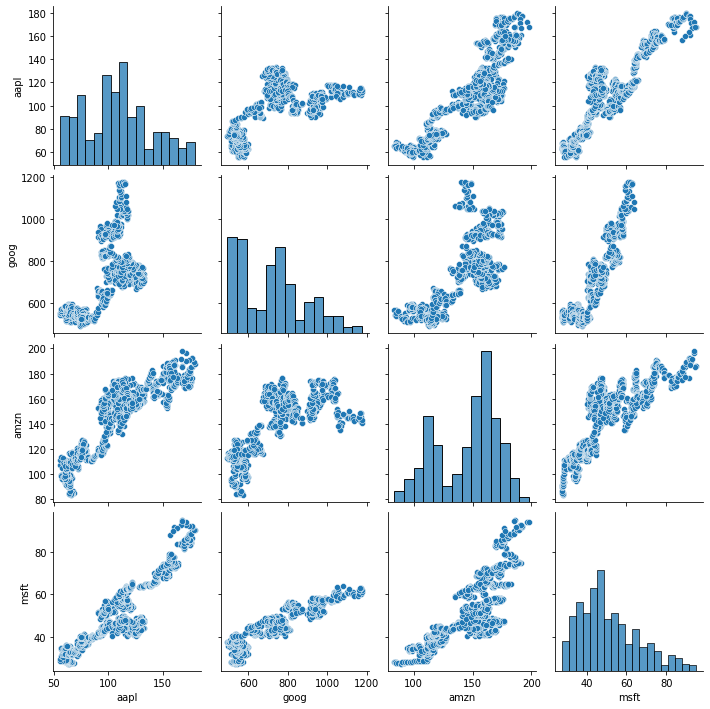

In [36]:
sns.pairplot(data=close)

<AxesSubplot:>

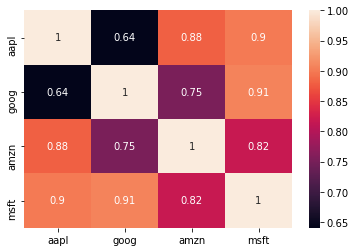

In [37]:
sns.heatmap(close.corr(),annot=True)

# Analysing daily return of each stock and how they are co-related

In [38]:
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [39]:
data = pd.DataFrame()

In [43]:
data['appl_change']=((appl['close']-appl['open'])/appl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [44]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,1.336868,0.725953
1,0.714688,-0.216075,-0.659444,0.753769
2,-2.481344,-1.781065,-0.544121,0.000000
3,-0.042869,1.489879,-0.023546,0.356761
4,0.443624,0.334039,-1.510859,0.427960


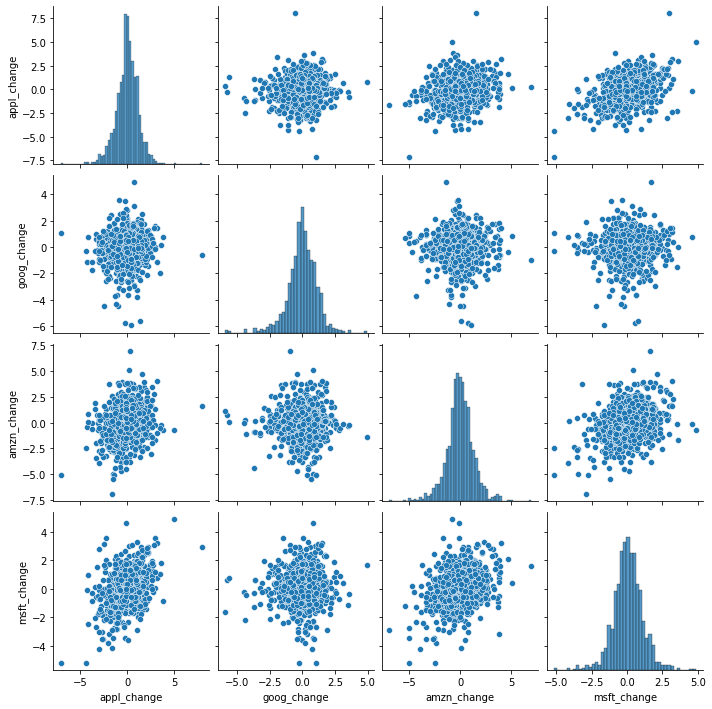

In [45]:
sns.pairplot(data=data)

<AxesSubplot:>

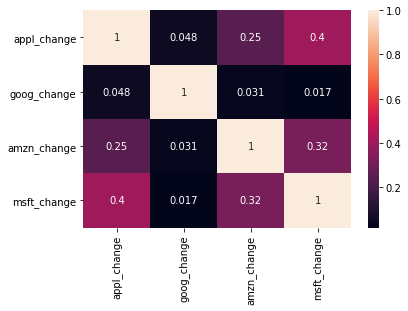

In [46]:
sns.heatmap(data.corr(),annot=True)

# Value at Risk Analysis For Tech Companies

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='appl_change', ylabel='Density'>

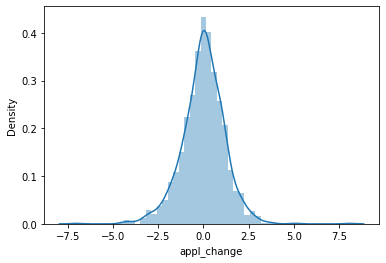

In [47]:
sns.distplot(data['appl_change'])

In [51]:
data['appl_change'].std()

### 68% of entire data

1.1871377131421237

In [52]:
data['appl_change'].std()*2

### 95% of entire data

2.3742754262842474

In [53]:
data['appl_change'].std()*3

### 99.7% of entire data

3.561413139426371

In [56]:
data['appl_change'].quantile(0.1)

### 90% of the time worst dialy loss will not exceed -1.42

-1.4246644227944307

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.006999,1.337707,-6.907010,-0.704850,-0.012964,0.731484,6.948399
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
